In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(x_train, y_train), (x_test, y_test) = mnist.load_data()



In [ ]:
x_train.shape
np.set_printoptions(linewidth=np.inf)
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

In [ ]:
y_train.shape
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

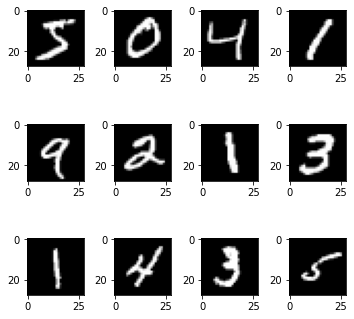

In [ ]:
plt.figure(figsize=(5,5))
for k in range(12):
  plt.subplot(3, 4 ,k+1)
  plt.imshow(x_train[k], cmap='gray')
plt.tight_layout()
plt.show()

In [ ]:
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')

x_train /= 255
x_test /= 255

x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.       

In [ ]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))



In [ ]:
model.compile(loss='mean_squared_error', 
       optimizer=optimizers.SGD(learning_rate=0.01),
       metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(x_test, y_test))

Epoch 1/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0939 - accuracy: 0.1000 - val_loss: 0.0927 - val_accuracy: 0.1010
Epoch 2/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0919 - accuracy: 0.1122 - val_loss: 0.0915 - val_accuracy: 0.1138
Epoch 3/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0910 - accuracy: 0.1277 - val_loss: 0.0908 - val_accuracy: 0.1273
Epoch 4/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0904 - accuracy: 0.1427 - val_loss: 0.0903 - val_accuracy: 0.1458
Epoch 5/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0900 - accuracy: 0.1647 - val_loss: 0.0899 - val_accuracy: 0.1707
Epoch 6/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0896 - accuracy: 0.1882 - val_loss: 0.0895 - val_accuracy: 0.1929
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0892 - accuracy: 0.2085 - val_loss: 0.0891 - val_accuracy: 0.2139

In [ ]:
pr = model.predict(x_test[0:5])
pr
np.round(pr,3)

array([[0.005, 0.001, 0.003, 0.01 , 0.006, 0.012, 0.001, 0.908, 0.003, 0.05 ],
       [0.098, 0.034, 0.449, 0.127, 0.003, 0.055, 0.177, 0.002, 0.051, 0.004],
       [0.003, 0.817, 0.037, 0.029, 0.01 , 0.017, 0.024, 0.017, 0.033, 0.013],
       [0.907, 0.   , 0.008, 0.006, 0.002, 0.041, 0.016, 0.012, 0.002, 0.005],
       [0.013, 0.003, 0.047, 0.006, 0.587, 0.038, 0.053, 0.06 , 0.029, 0.165]], dtype=float32)

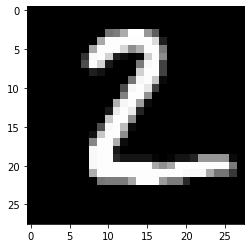

In [156]:
plt.imshow(x_test[1].reshape((28,28)),cmap='gray')

In [ ]:
digit = plt.imread('/content/drive/MyDrive/Deep Learning/week2/0.png')
digit.shape

(28, 28, 3)

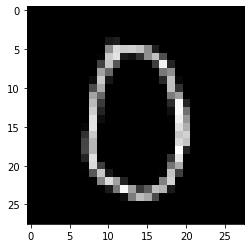

In [ ]:
plt.imshow(digit[:,:,0],cmap='gray')


In [ ]:
digit[:,:,0].reshape((1,-1)).shape

(1, 784)

In [ ]:
p = model.predict(digit[:,:,0].reshape((1,-1)))
p
np.argmax(p)

0

[[0.261277   0.02233813 0.12609126 0.17124708 0.04689766 0.1685036  0.03302513 0.07126993 0.05365891 0.04569131]]
[[0.01423712 0.35189015 0.05456153 0.0525756  0.03883048 0.11196884 0.10683428 0.02571589 0.19339302 0.04999316]]
[[0.02422978 0.13845463 0.47258672 0.08707216 0.00764069 0.03349708 0.17032881 0.00507161 0.05349154 0.00762696]]
[[0.01478663 0.02451712 0.0235162  0.8034843  0.00472816 0.07478762 0.00901976 0.01168967 0.02544603 0.00802444]]
[[0.00917215 0.17010464 0.04920167 0.01645176 0.35108504 0.06234049 0.12999843 0.04334111 0.04719488 0.12110984]]
[[0.03831107 0.02138926 0.02277429 0.29001427 0.05571917 0.38145703 0.02264421 0.02311065 0.1099794  0.03460064]]
[[0.07145151 0.03195643 0.07403377 0.02923839 0.23039347 0.22036046 0.12877229 0.05881118 0.05909342 0.09588901]]
[[0.02620336 0.01854756 0.20958938 0.19594468 0.11242706 0.07569792 0.0434969  0.20778637 0.03547141 0.07483536]]
[[0.0141004  0.03663413 0.1539656  0.15155242 0.08344706 0.15874241 0.04178542 0.0229088

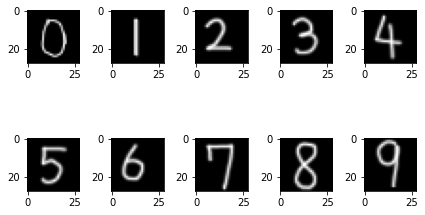

0 1 2 3 4 5 4 2 8 3 


In [157]:
result = ''
for i in range(10):
  path = '/content/drive/MyDrive/Deep Learning/week2/'+ str(i) +'.png'
  digit = plt.imread(path)
  plt.subplot(2, 5 ,i+1)
  plt.imshow(digit[:,:,0],cmap='gray')
  p = model.predict(digit[:,:,0].reshape((1,-1)))
  print(p)
  result += str(np.argmax(p)) + ' '

plt.tight_layout()
plt.show()
print (result)
  